In [1]:
# Linear Methods for Classification
import pandas as pd
from pymatgen.core import Element, Composition
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
rcparams = {'legend.fontsize': 20,
            'figure.figsize': (12, 8),
            'axes.labelsize': 24,
            'axes.titlesize': 28,
            'xtick.labelsize':20,
            'ytick.labelsize': 20}
sns.set(rc=rcparams)
mpl.rcParams.update(rcparams)

%matplotlib inline

# This sets the inline figures to high resolution for Retina display...
%config InlineBackend.figure_format ='retina'

In [2]:
binaries = pd.read_csv('binary_band_gap.csv')
# The head() method in DataFrame is useful to get a look at the 
# first few entries so that we know what the dataset looks like.
binaries.head()

,Formula,Eg (eV)
0,AgAu3,0.00
1,BaAg2,0.00
2,AgBr,2.52
3,CdAg,0.00
4,AgCl,5.13


In [3]:
binaries['composition'] = [Composition(c) for c in binaries['Formula']]
binaries['composition']

0      (Ag, Au)
1      (Ba, Ag)
2      (Ag, Br)
3      (Cd, Ag)
4      (Ag, Cl)
         ...   
891     (Y, Tm)
892     (U, Zn)
893     (Yb, V)
894     (Zr, W)
895     (Y, Zn)
Name: composition, Length: 896, dtype: object

In [4]:
def classify(eg):
    # We specific metals to be band gap less than 1e-5. 
    # Note that we do not use eg==0.0 since float representation
    # in python is not precise
    if eg < 1e-5:   
        return 0
    else:
        return 1

electronegs = [[el.X for el in c] for c in binaries['composition']]
binaries['mean_X'] = [np.mean(e) for e in electronegs]
binaries['diff_X'] = [max(e) - min(e) for e in electronegs]
binaries['class'] = [classify(eg) for eg in binaries['Eg (eV)']]
# Here, we will print out a few lines to see what our dataset looks like now.
binaries.head()

,Formula,Eg (eV),composition,mean_X,diff_X,class
0,AgAu3,0.00,"(Ag, Au)",2.235,0.61,0
1,BaAg2,0.00,"(Ba, Ag)",1.410,1.04,0
2,AgBr,2.52,"(Ag, Br)",2.445,1.03,1
3,CdAg,0.00,"(Cd, Ag)",1.810,0.24,0
4,AgCl,5.13,"(Ag, Cl)",2.545,1.23,1


In [5]:
electronegs

[[1.93, 2.54],
 [0.89, 1.93],
 [1.93, 2.96],
 [1.69, 1.93],
 [1.93, 3.16],
 [1.22, 1.93],
 [1.93, 3.98],
 [1.93, 2.66],
 [1.78, 1.93],
 [0.82, 1.93],
 [1.27, 1.93],
 [1.93, 3.04],
 [1.93, 3.44],
 [1.93, 2.19],
 [1.93, 2.2],
 [1.93, 2.28],
 [1.93, 2.58],
 [1.36, 1.93],
 [1.17, 1.93],
 [0.95, 1.93],
 [1.93, 2.1],
 [1.63, 1.93],
 [1.1, 1.93],
 [1.65, 1.93],
 [1.33, 1.93],
 [1.61, 2.18],
 [1.61, 2.04],
 [0.89, 1.61],
 [1.61, 2.02],
 [1.12, 1.61],
 [1.61, 1.88],
 [1.61, 1.9],
 [1.61, 1.83],
 [1.3, 1.61],
 [1.61, 2.2],
 [1.1, 1.61],
 [0.98, 1.61],
 [1.31, 1.61],
 [1.55, 1.61],
 [1.61, 3.04],
 [1.61, 1.91],
 [1.61, 2.19],
 [1.61, 2.28],
 [1.61, 2.28],
 [1.61, 2.2],
 [1.61, 2.58],
 [1.61, 2.05],
 [1.61, 2.55],
 [1.17, 1.61],
 [1.61, 1.96],
 [0.95, 1.61],
 [1.5, 1.61],
 [1.61, 1.9],
 [1.61, 2.1],
 [1.3, 1.61],
 [1.54, 1.61],
 [1.38, 1.61],
 [1.61, 1.63],
 [1.1, 1.61],
 [1.33, 1.61],
 [2.18, 2.54],
 [2.04, 2.18],
 [2.18, 2.96],
 [1.69, 2.18],
 [1.88, 2.18],
 [1.66, 2.18],
 [0.79, 2.18],
 [1.22, 

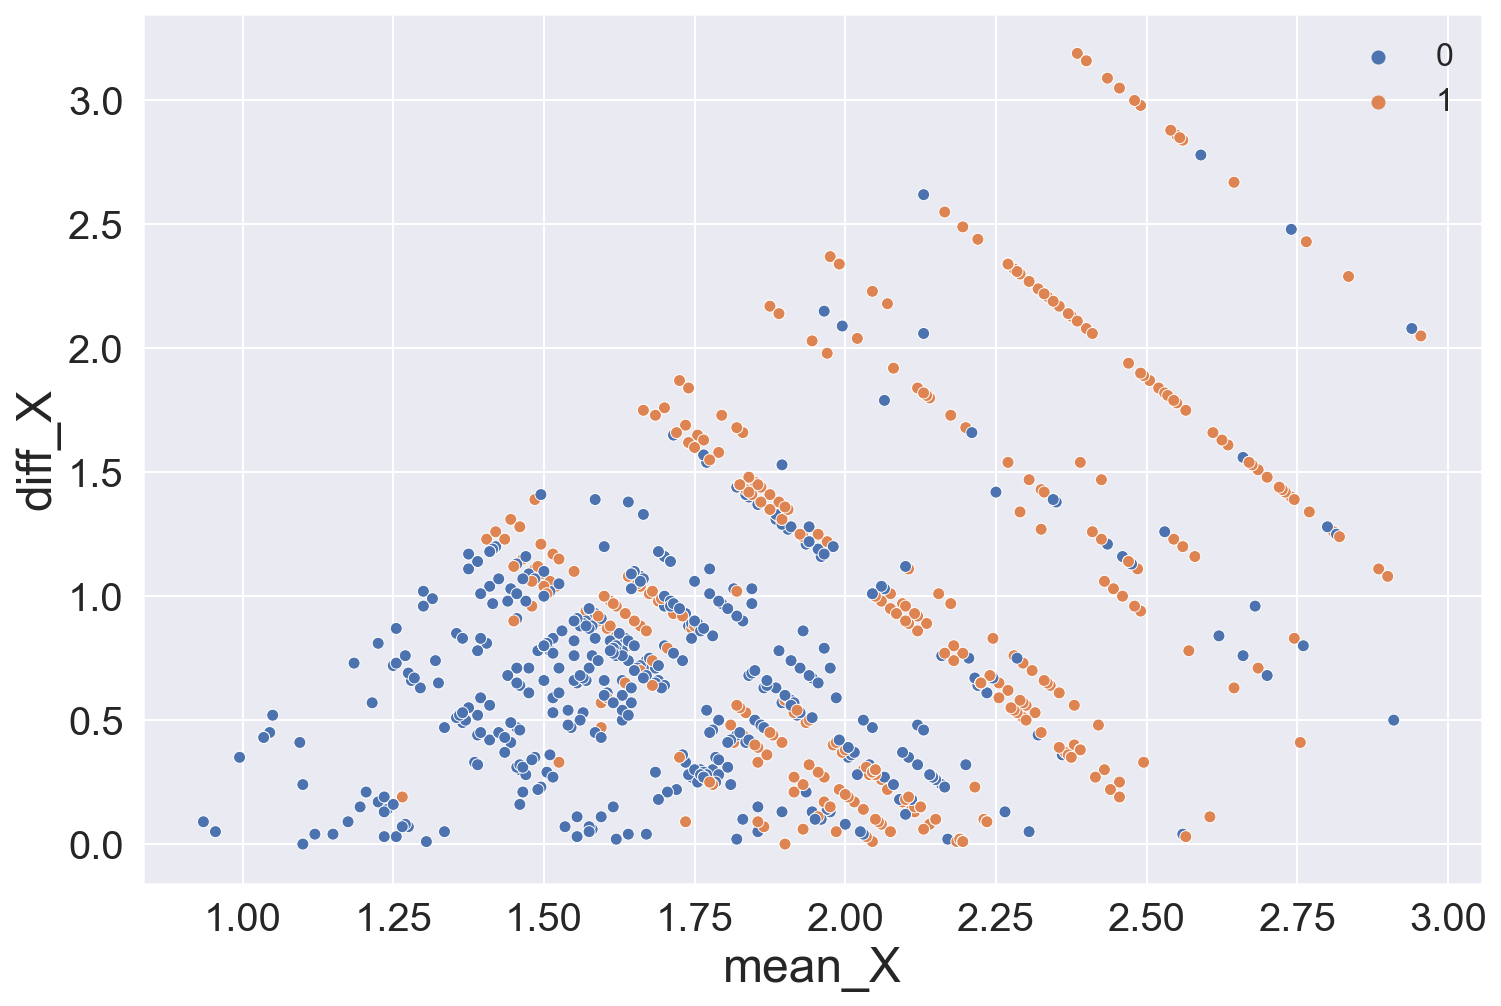

In [6]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='mean_X', y='diff_X', hue='class', data=binaries)
plt.legend(frameon=False, fontsize=16);

In [7]:
# Data splits to train and test

In [8]:
from sklearn.model_selection import train_test_split

X = binaries[["mean_X", "diff_X"]]
y = binaries["class"]

# Test data is 10%
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# Linear Discriminant Analysis

In [10]:
from scipy import linalg

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = mpl.colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Plot functions
def plot_data(da, X, y, plot_ellipses=True):
    sns.scatterplot(X["mean_X"], X["diff_X"], hue=y)

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    #  xx, yy creates points covering the entire 2D area
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    # Predict the probability at any point
    Z = da.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 0].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=mpl.colors.Normalize(0., 1.), zorder=0)
    # Contour plots with only one level, 0.5
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
    ax = plt.gca()
    
    if plot_ellipses:
        # means
        for i, mean in enumerate(da.means_):        
            plt.plot(mean[0], mean[1],
                     '*', color='yellow', markersize=15, markeredgecolor='grey')
            # This plots an Ellipse showing the location of the mean and covariance.
            if isinstance(da, LinearDiscriminantAnalysis):
                cov = da.covariance_
            else:
                cov = da.covariance_[i]
            v, w = linalg.eigh(cov)
            u = w[0] / linalg.norm(w[0])
            angle = np.arctan(u[1] / u[0])
            angle = 180 * angle / np.pi  # convert to degrees
            # filled Gaussian at 2 standard deviation
            ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                                      180 + angle, facecolor="grey",
                                      edgecolor='black', linewidth=2)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.2)
            ax.add_artist(ell)

    return plt

C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YoYo\AppData\Local\Temp/ipykernel_11376/614180215.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


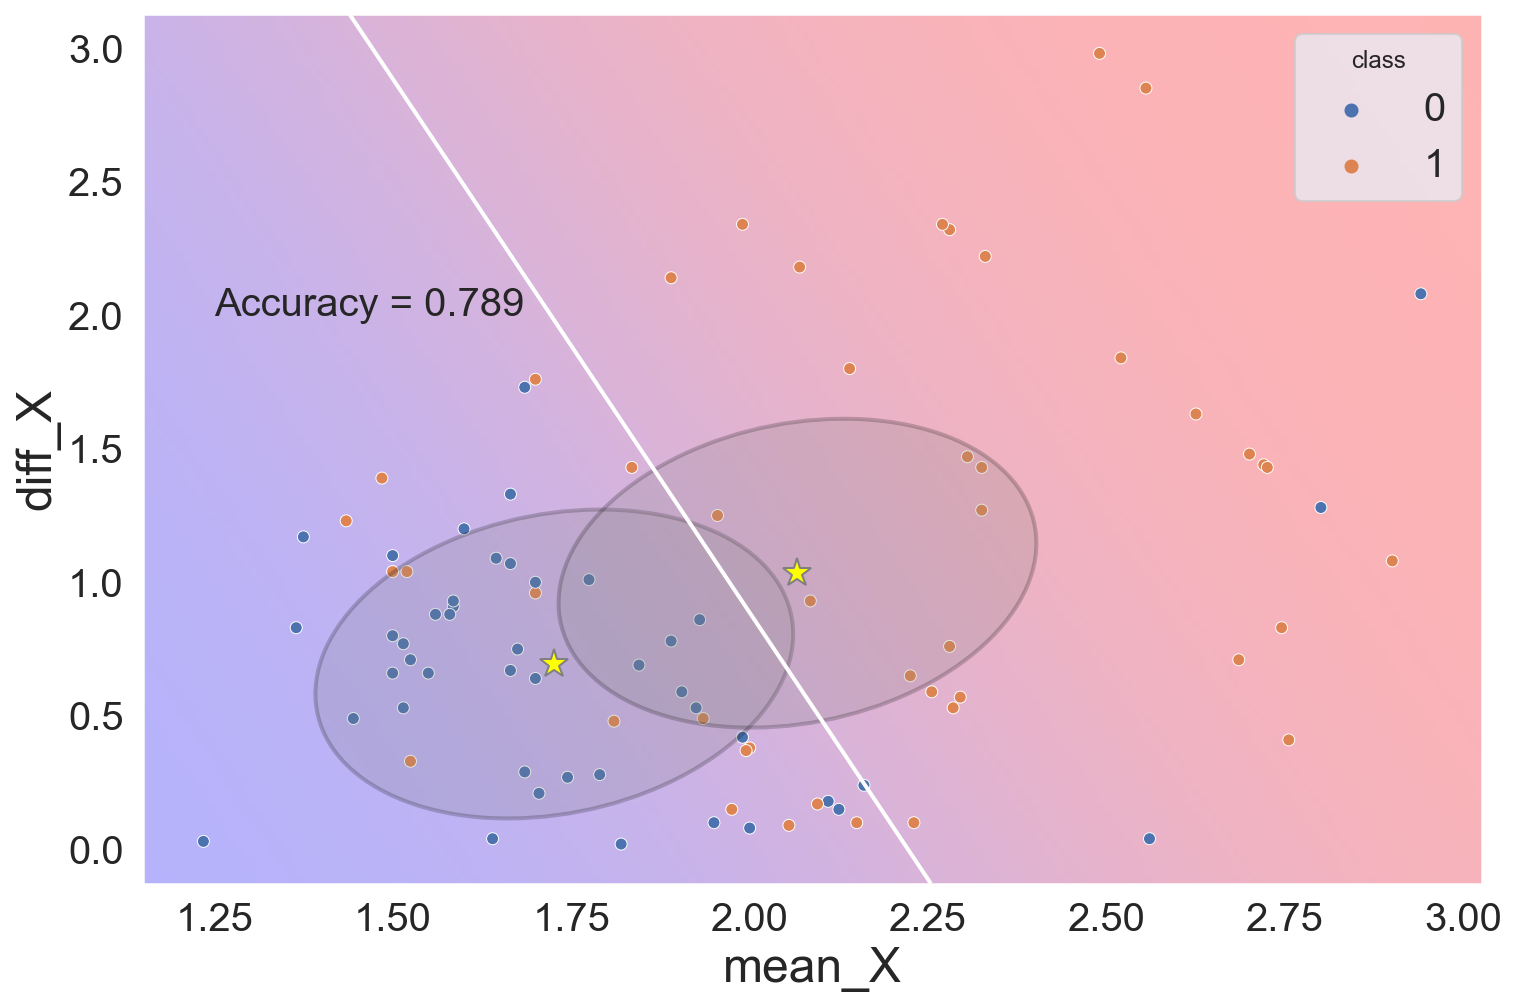

In [11]:
plt.figure(figsize=(12, 8))
# The hyperparameters such as `store_covariance` is set to a fixed value
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)

model = lda.fit(train_X, train_y)

y_pred = model.predict(test_X)
splot = plot_data(lda, test_X, test_y)

# Compute the test accuracy
splot.annotate("Accuracy = %.3f" % model.score(test_X, test_y), (1.25, 2), fontsize=20);

In [12]:
model.score

<bound method ClassifierMixin.score of LinearDiscriminantAnalysis(store_covariance=True)>

In [13]:
# Quadratic Discrimnant Analysis

C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YoYo\AppData\Local\Temp/ipykernel_11376/614180215.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


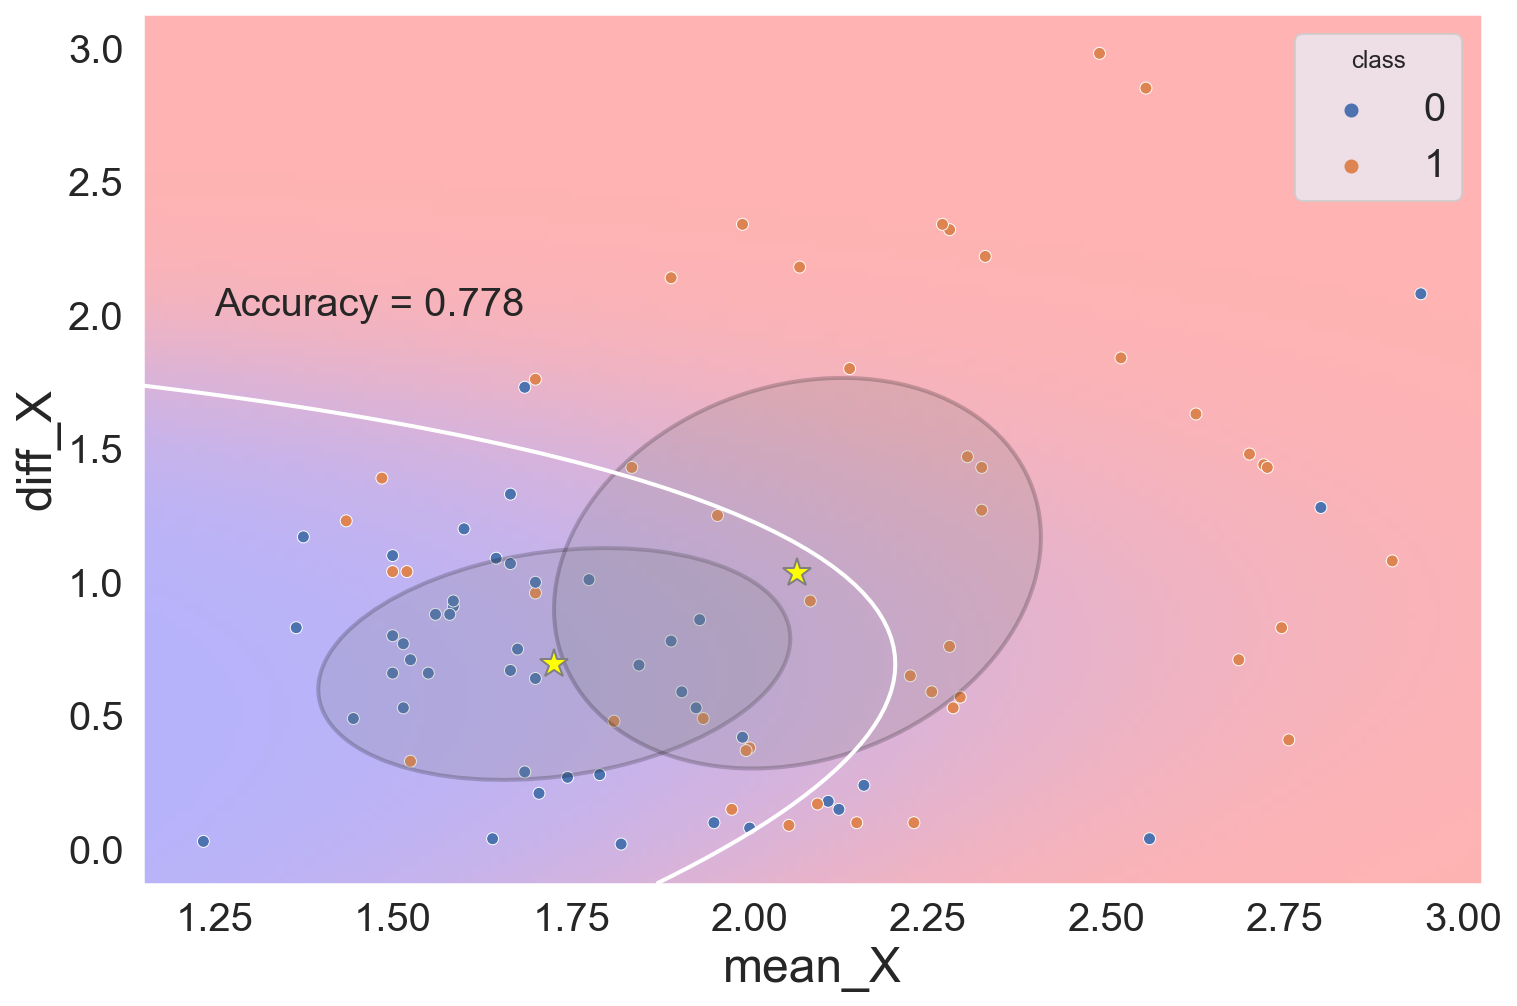

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
model = qda.fit(train_X, train_y)
y_pred = model.predict(test_X)

plt.figure(figsize=(12, 8))
plot = plot_data(qda, test_X, test_y)
plot.annotate("Accuracy = %.3f" % model.score(test_X, test_y), (1.25, 2), fontsize=20);

In [15]:
# Logistic Regression

C:\Users\YoYo\miniconda3\envs\nano281\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\YoYo\AppData\Local\Temp/ipykernel_11376/614180215.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',


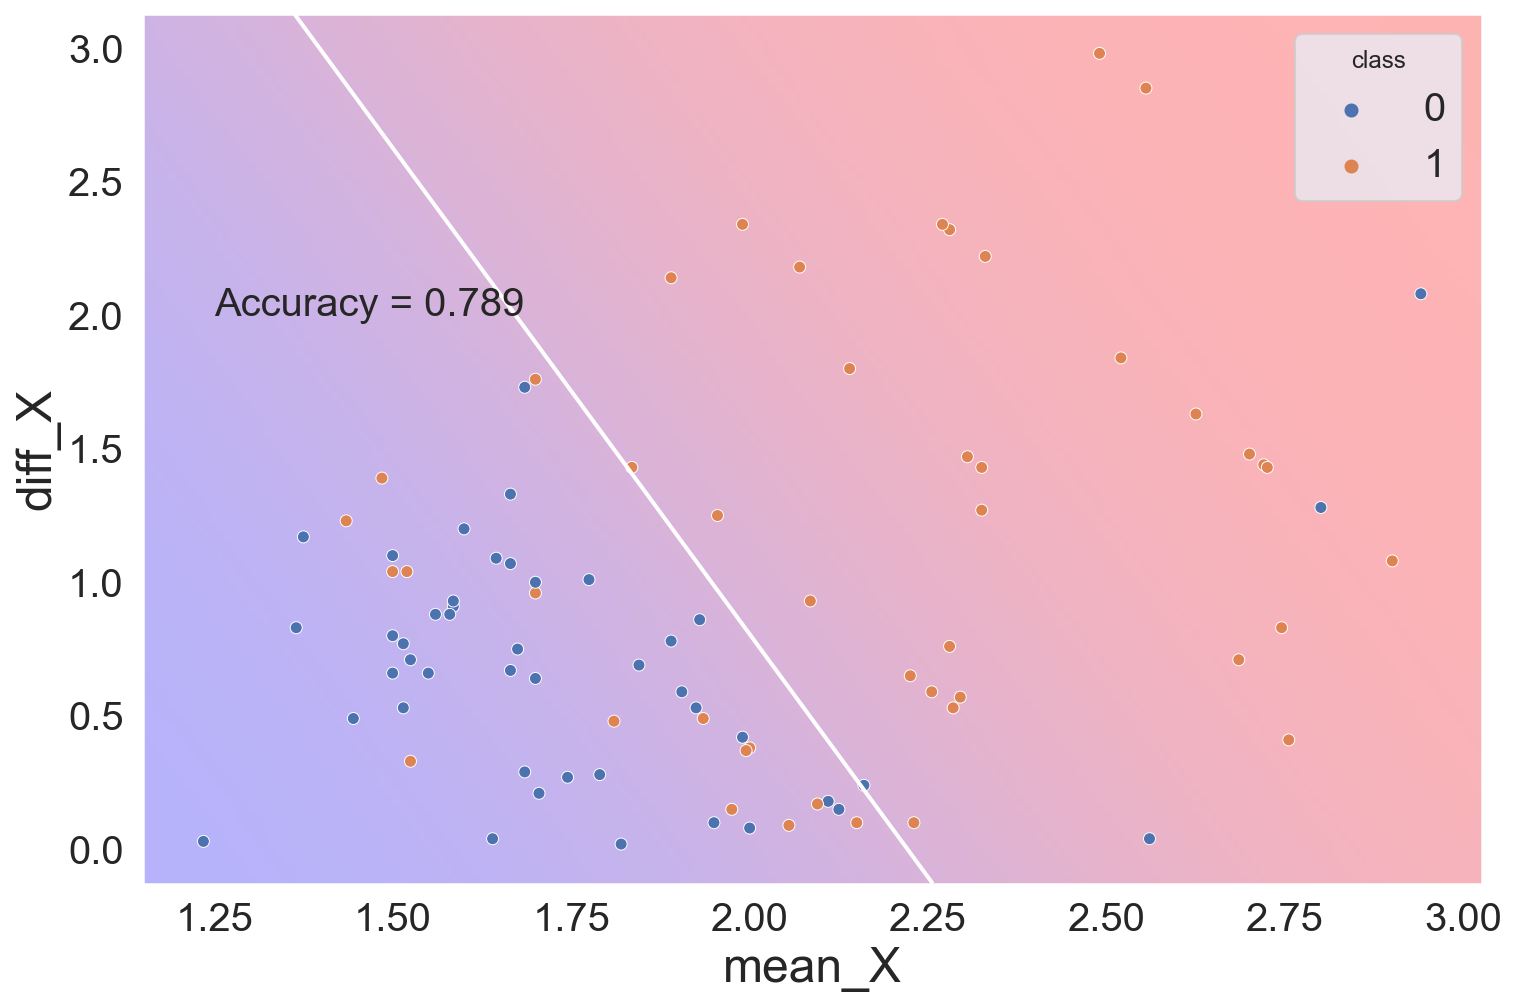

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none', solver='lbfgs')
model = clf.fit(train_X, train_y)
y_pred = model.predict(test_X)

plt.figure(figsize=(12, 8))
plot = plot_data(clf, test_X, test_y, plot_ellipses=False)
plot.annotate("Accuracy = %.3f" % model.score(test_X, test_y), (1.25, 2), fontsize=20);